This is the Model module

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
# Load train and test data
train_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_train.csv")
test_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_test.csv")

# Define bin edges for Adjusted Merged Budget
bin_edges = np.percentile(train_df['Adj Merged Budget'], [0, 33, 67, 100])
bin_labels = ['1', '2', '3']  # Adjusted the labels to match the number of bins (one less than edges)

# Split train data into three bins based on Adjusted Merged Budget
train_df['Budget Bins'] = pd.cut(train_df['Adj Merged Budget'], bins=bin_edges, labels=bin_labels)
# Split test data into three bins based on Adjusted Merged Budget
test_df['Budget Bins'] = pd.cut(test_df['Adj Merged Budget'], bins=bin_edges, labels=bin_labels)

In [9]:
train_df[train_df["Budget Bins"] == '1']

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Genres,IMDB Title,MPAA,Domestic Distributor,Domestic Opening,Earliest Release Date,IMDB Budget,...,Total Director Score_normalized,Avg Director Score_normalized,Total Production Company Score_normalized,Avg Production Company Score_normalized,Domestic Distributor Score_normalized,Season_ASO_4,Season_FMA_2,Season_MJJ_3,Season_NDJ_1,Budget Bins
32,32,32,32,Comedy Romance,One Small Hitch (2013),NaN,NaN,NaN,"July 19, 2013 (Türkiye)",0,...,0.615019,-0.149329,-1.603747,-0.415497,-1.864894,False,True,False,False,1
101,102,102,102,Comedy Horror Romance,April Apocalypse (2013),NaN,NaN,NaN,"July 15, 2015 (Philippines)",0,...,-1.015428,-0.931398,-0.144940,-1.374389,-0.783474,False,True,False,False,1
313,318,318,318,Adventure Animation Comedy Sport,Frog Kingdom (2013),PG,NaN,NaN,"December 28, 2013 (China)",0,...,-0.968495,-0.792978,-0.463798,-0.327983,-0.727613,False,False,True,False,1
352,358,358,358,Documentary History,Our Man in Tehran (2013),NaN,First Run,1640.0,"May 15, 2015 (Domestic)",0,...,-1.454834,-1.692726,-0.720877,-0.963894,0.078916,False,False,True,False,1
540,549,549,549,Comedy Drama Romance,Boy Meets Girl (2014),NaN,"Bramacharia, LLC",5306.0,"February 6, 2015 (Domestic)",0,...,0.755162,1.082161,-0.252435,-0.270826,-0.025231,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2974,2974,2974,Action Comedy Crime Thriller,Guns Akimbo (2019),R,NaN,NaN,"February 27, 2020 (APAC, EMEA)",0,...,-0.041380,-0.141507,0.252311,0.069097,-2.682918,False,True,False,False,1
2947,2976,2976,2976,Documentary,She Is the Ocean (2018),NaN,Blue Fox Entertainment,8017.0,"October 16, 2020 (Domestic)",0,...,-0.927307,0.209406,-1.879780,-0.917154,-0.575831,True,False,False,False,1
2949,2978,2978,2978,Horror Mystery Thriller,Blood Widow (2020),NaN,Indican Pictures,NaN,"August 4, 2019 (Domestic)",0,...,-1.994908,0.675568,-0.784145,-0.813468,-1.089070,False,False,False,True,1
2952,2981,2981,2981,Drama,Jungleland (2019),R,Vertical Entertainment,NaN,"November 6, 2020 (Domestic)",0,...,-1.058947,0.579066,0.424440,0.595715,-0.040441,False,False,False,True,1


In [21]:
X_vars = ['Runtime', 'Genre Cluster', 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'Holiday', 'Adj Merged Budget', 'Has Star Score', 'Has Director Score', 'Has Production Company Score', 'Has Domestic Distributor Score', 'Unweighted Star Score_normalized', 'Simple Weight Star Score_normalized', 'Log Weight Star Score_normalized', 'Exponential Weight Star Score_normalized', 'Total Director Score_normalized', 'Avg Director Score_normalized', 'Total Production Company Score_normalized', 'Avg Production Company Score_normalized', 'Domestic Distributor Score_normalized', 'Season_ASO_4', 'Season_FMA_2', 'Season_MJJ_3', 'Season_NDJ_1']
y = ["Adj Merged Revenue"]

In [22]:
train_X = train_df[X_vars]
train_y = train_df[y]
test_X = test_df[X_vars]
test_y = test_df[y]

We decided to use the iterative importer with a random forrest regressor

In [23]:
imp = IterativeImputer(min_value=0, max_iter=1000, random_state=102, estimator=RandomForestRegressor())

Now to build the pipeline, we need the type of models we want to try.

# Step 3: Building the Pipeline
pipeline = Pipeline([
    ('imputer', imp),
    ('regressor', RandomForestRegressor())  # placeholder, will be replaced by GridSearchCV
])

# Step 4: Define Parameter Grid
param_grid = [
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 10, 20]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.1, 1]
    },
    {
        'regressor': [SVR()],
        'regressor__C': [1, 10],
        'regressor__kernel': ['linear', 'rbf']
    }
]

# Step 3: Grid Search Setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Step 4: Train and Evaluate
# Assuming 'target_column' is your target variable
grid_search.fit(train_X, train_y)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best model:", best_model)
print("Best parameters:", best_params)

In [24]:
# Step 3: Building the Pipeline
# Assuming train_X and train_y are your training features and target variable
# Convert train_y to a 1D array
train_y = np.ravel(train_y)

pipeline = Pipeline([
    ('imputer', imp),
    ('regressor', RandomForestRegressor())  # RandomForestRegressor without grid search
])

# Train the RandomForestRegressor
pipeline.fit(train_X, train_y)

# Get the trained model
trained_model = pipeline.named_steps['regressor']

In [25]:
# Assuming you have test_X as your test features
# Make predictions using the trained model
predictions = pipeline.predict(test_X)

# Now you can use these predictions for further analysis or evaluation
# For instance, if you have test_y (actual target values), you can evaluate the model performance
# For example, using metrics like mean squared error (MSE) or R-squared
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Assuming test_y is your actual target variable for the test data
# Evaluate the model
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
mape = mean_absolute_percentage_error(test_y, predictions)
r_squared = r2_score(test_y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 726038887880989.6
Mean Absolute Error (MAE): 11181124.11770822
Mean Absolute Percentage Error (MAPE): 27.435375466493
R-squared: 0.5010210352074218


In [26]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
for reg in [RandomForestRegressor(), SVR(), GradientBoostingRegressor()]:
    
    train_y = np.ravel(train_y)

    pipeline = Pipeline([
        ('imputer', imp),
        ('regressor', reg)  # RandomForestRegressor without grid search
    ])

    # Train the RandomForestRegressor
    pipeline.fit(train_X, train_y)
    r2cv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="r2")
    rmsecv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="neg_root_mean_squared_error")
    mapecv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="neg_mean_absolute_percentage_error")
    maecv = cross_val_score(pipeline, train_X, train_y, cv=5, scoring="neg_mean_absolute_error")

    # Get the trained model
    trained_model = pipeline.named_steps['regressor']

    # Assuming you have test_X as your test features
    # Make predictions using the trained model
    predictions = pipeline.predict(test_X)

    # Now you can use these predictions for further analysis or evaluation
    # For instance, if you have test_y (actual target values), you can evaluate the model performance
    # For example, using metrics like mean squared error (MSE) or R-squared
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    # Assuming test_y is your actual target variable for the test data
    # Evaluate the model
    mse = mean_squared_error(test_y, predictions)
    mae = mean_absolute_error(test_y, predictions)
    mape = mean_absolute_percentage_error(test_y, predictions)
    r_squared = r2_score(test_y, predictions)

    print("Regressor:", reg)
    print("ON TRAINING, CROSS VALIDATION:")
    print("Root Mean Squared Error (MSE):", np.mean(rmsecv))
    print("Mean Absolute Error (MAE):", np.mean(maecv))
    print("Mean Absolute Percentage Error (MAPE):", np.mean(mapecv))
    print("R-squared:", np.mean(r2cv))
    print("ON TESTING:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R-squared:", r_squared)
    

NameError: name 'train_y' is not defined

In [28]:
for reg in [RandomForestRegressor(n_estimators=100, max_depth=10), RandomForestRegressor(n_estimators=100, max_depth=20), RandomForestRegressor(n_estimators=100, max_depth=50)]:
    
    train_y = np.ravel(train_y)

    pipeline = Pipeline([
        ('imputer', imp),
        ('regressor', reg)  # RandomForestRegressor without grid search
    ])

    # Train the RandomForestRegressor
    pipeline.fit(train_X, train_y)

    # Get the trained model
    trained_model = pipeline.named_steps['regressor']

    # Assuming you have test_X as your test features
    # Make predictions using the trained model
    predictions = pipeline.predict(test_X)

    # Now you can use these predictions for further analysis or evaluation
    # For instance, if you have test_y (actual target values), you can evaluate the model performance
    # For example, using metrics like mean squared error (MSE) or R-squared
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    # Assuming test_y is your actual target variable for the test data
    # Evaluate the model
    mse = mean_squared_error(test_y, predictions)
    mae = mean_absolute_error(test_y, predictions)
    mape = mean_absolute_percentage_error(test_y, predictions)
    r_squared = r2_score(test_y, predictions)

    print("Regressor:", reg)
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R-squared:", r_squared)

Regressor: RandomForestRegressor(max_depth=10)
Mean Squared Error (MSE): 742572443109402.6
Mean Absolute Error (MAE): 11243410.148189368
Mean Absolute Percentage Error (MAPE): 38.156339914808676
R-squared: 0.4896581503676132
Regressor: RandomForestRegressor(max_depth=20)
Mean Squared Error (MSE): 702054812628498.4
Mean Absolute Error (MAE): 11256867.915241932
Mean Absolute Percentage Error (MAPE): 35.07074114057786
R-squared: 0.5175043796132893
Regressor: RandomForestRegressor(max_depth=50)
Mean Squared Error (MSE): 719468580378833.5
Mean Absolute Error (MAE): 11125089.09652221
Mean Absolute Percentage Error (MAPE): 25.926364756313845
R-squared: 0.505536558122955


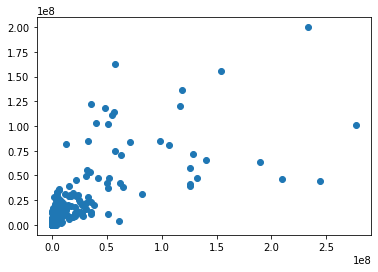

In [30]:
import matplotlib.pyplot as plt
test_y["Predictions"] = predictions
test_y["differences"] = abs(test_y["Adj Merged Revenue"] - test_y["Predictions"])
plt.scatter(np.array(test_y["Adj Merged Revenue"]), np.array(test_y["Predictions"]))